In [1]:
#jupyter nbconvert presentation.ipynb  --config my_slide_config.py
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from scipy.stats import expon
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn') # pretty matplotlib plots
plt.rcParams['figure.figsize'] = (12, 8)
import scipy.stats as ss
from aux_plots import plot_exponential, plot_beta, plot_normal,plot_discrete, simulate_linear_data, plot_log_likelihood
import warnings
warnings.filterwarnings('ignore')
import pymc3 as pm
import statsmodels.api as sm
import seaborn as sns

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Inferência Frequencista vs Bayesiana
-----
### Rafael Rui
#### Cientista de dados TOTVS Labs. 

# Dogma Central da Estatística
-----


* **Probabilidades** descrevem as **incertezas** sobre um processo
    - Probabilidades: Muito bem definidas (matematicamente)
    - Incertezas: depende pra quem você pergunta


### Spoiler alert!
*A diferença central entre  Frequencistas e Bayesianos está na definição de incertezas*

## Agenda
---

1. Inferência estatística
    - Probabilidade
    - Distribuições de Probabilidades
    - Likelihood
    - Teorema de Bayes. 
1. Frequencista vs Bayesiana
1. Estimativa Frequencista
    - Maximum Likelihood
    - Intervalo de Confiança
1. Estimativa Bayesiana 
    - Intervalo de Credibilidade
    - Distribuição a Priori

# Inferência Estatística
-----

* Inferência Estatística é um conjunto de técnicas que objetiva estudar uma população através de evidências fornecidas por uma amostra.
    * População é o conjunto de todos os elementos ou resultados sob investigação. 
    * Amostra é qualquer subconjunto da população.
* Objetivo: encontrar um modelo probabilístico que melhor descreva o comportamento dessa população.

* É através do modelo probabilistico gerado que calcula-se as probabilidades de certos acontecimentos




# Exemplo:
-----

* Encontrar o a porção $\theta$ de pessoas que vieram aqui apenas para comer pizza e tomar cerveja. 
    1. Escolher o modelo estatistico que quero utilizar. 
    1. Utilizao meetups anteriores para encontrar estimar esse modelo.
        - Encontrar o modelo probabilistico que descreve esse processo
    2. Então, baseado nas pessoas que estão aqui hoje, estimar o numero de pessoas que veio so pela pizza. 
     


In [2]:
x_beta = np.linspace(0, 1, 5000)
x_gauss = np.linspace(-5, 5, 5000)
x_exp = np.linspace(0, 5, 5000)
xk = np.arange(6)+1
pk =  (0.1, 0.2, 0.3, 0.1, 0.5, 0.1, 0.15)
pk =  (1,1,1,1,1,1)
pk = list(i/sum(pk) for i in pk)

###  1. Probabilidade
-----
* Definição matemática em 1933 - Andrey Kolmogorov - 
    - Axiomas de  Kolmogorov
* Probabilidade é uma medida de **incerteza**
* Valores sempre entre 0 e 1
    * 0 indica incerteza
    * 1 indica certeza absoluta
    

###  2. Distribuição de probabilidades
-----  
* Como as probabilidades se distribuem dentre os valores possíves. 
* Modelos estatísticos são contruidos utilizando as distribuições.
* e.g., 

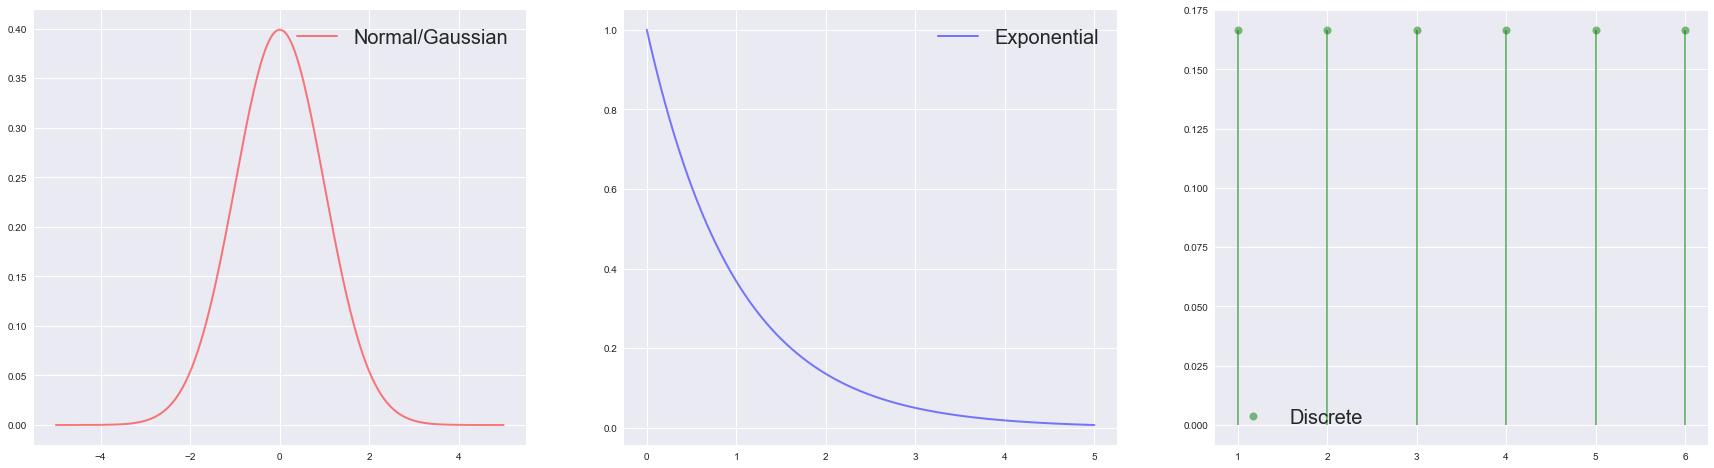

In [3]:
plt.figure(figsize=(30, 8))#
plt.subplot(1, 3, 1)
plot_normal(x_gauss, 0, 1, color='red', lw=2, ls='-', alpha=0.5, label='Normal/Gaussian' )
plt.legend(prop={'size': 20} );
plt.subplot(1, 3, 2)
plot_exponential(x_exp, 0, 1, color='blue', lw=2, ls='-', alpha=0.5, label='Exponential')
plt.legend(prop={'size': 20} );
plt.subplot(1, 3, 3)
plot_discrete(xk, pk)
plt.legend(prop={'size': 20} );

### 3. Parâmetros de distribuições de probabilidades

-----  

* Onde a inferência acontece. 
* Determina as propriedades dessa distribuição.  
* São os parâmetros que utilizamos para comparar duas distribuições.    
* e.g., $\mathcal{N}(\mu,\sigma^2)$

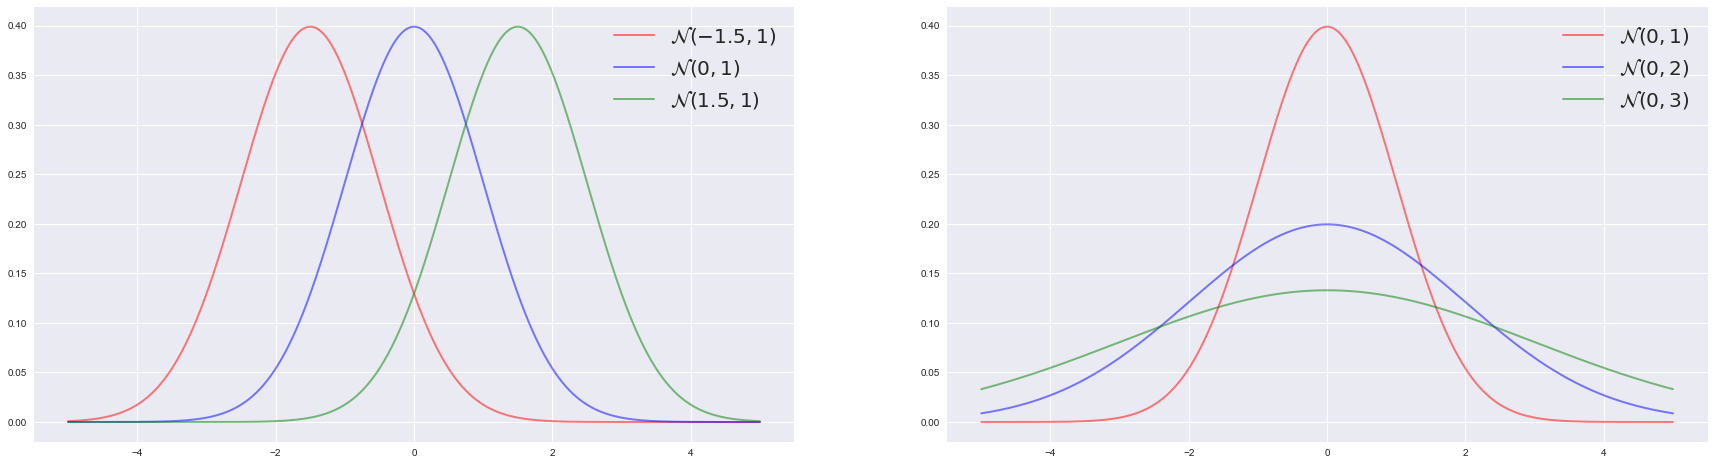

In [4]:
plt.figure(figsize=(30, 8))#
plt.subplot(1, 2, 1)
plot_normal(x_gauss, -1.5, 1, color='red', lw=2, ls='-', alpha=0.5, label='$\mathcal{N}(-1.5,1)$' )
plot_normal(x_gauss, 0, 1, color='blue', lw=2, ls='-', alpha=0.5, label='$\mathcal{N}(0,1)$' )
plot_normal(x_gauss, 1.5, 1, color='green', lw=2, ls='-', alpha=0.5, label='$\mathcal{N}(1.5,1)$' )
plt.legend(prop={'size': 20} );
plt.subplot(1, 2, 2)
plot_normal(x_gauss, 0, 1, color='red', lw=2, ls='-', alpha=0.5, label='$\mathcal{N}(0,1)$' )
plot_normal(x_gauss, 0, 2, color='blue', lw=2, ls='-', alpha=0.5, label='$\mathcal{N}(0,2)$' )
plot_normal(x_gauss, 0, 3, color='green', lw=2, ls='-', alpha=0.5, label='$\mathcal{N}(0,3)$' )
plt.legend(prop={'size': 20} );

### 4. Função likelihood (verossimilhança)
-----  
    
* **Não é uma medida de probabilidade**
* A função likelihood avalia como a probabilidade em obter um certo conjunto de dados varia para diferentes modelos
    - diferentes valores de $\mu$ e $\sigma$ no caso de $\mathcal{N}(\mu,\sigma^2)$
* Quão bem cada *modelo* explica os dados medidos. 
* e.g,: Cara-Coroa: 
    * $\theta$ é a probabilidade de cara e $(1-\theta)$ é a probabilidade de coroa.
    * $x=1$ indica "cara" e $x=0$ coroa. Logo:

     $$f(x,\theta)=\theta^x (1-\theta)^{1-x}$$
     
    * **$f(x,\theta)$ é função de duas variáveis.**

#### Para $\theta$ fixo
* $f(x,2/3)$ é a probabilidade de cara/coroa dado $\theta=2/3$,
$$
f(x,2/3) = (2/3)^x (1/3)^{1-x}
$$

No handles with labels found to put in legend.


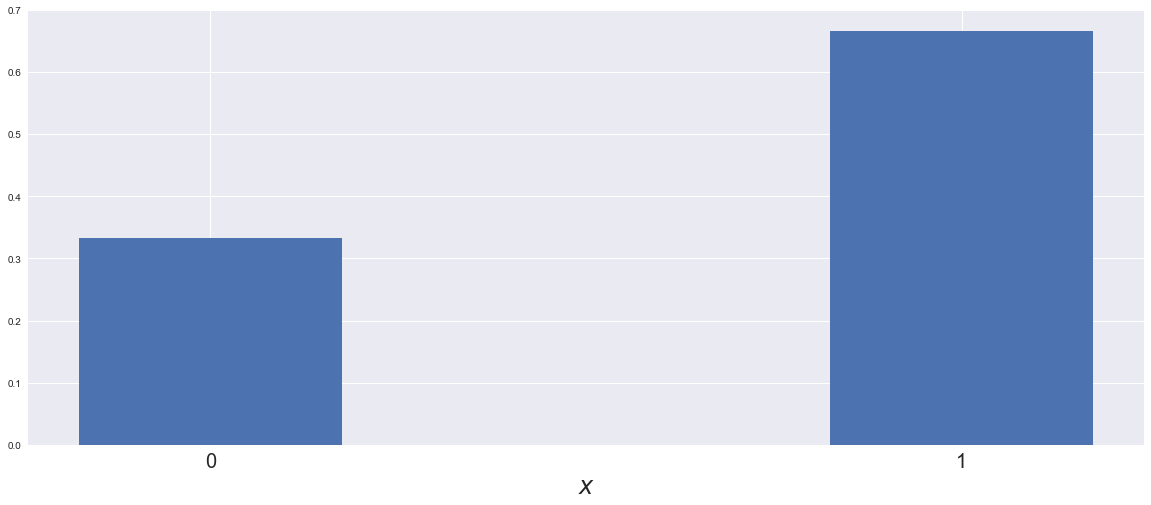

In [5]:
p1 = (2/3)**(0)*(1 - 2/3)**(1-0)
p2 = (2/3)**(1)*(1 - 2/3)**(1-1)
plt.figure(figsize=(20, 8));
plt.bar([0,1], [p1,p2], 0.35);
plt.legend(prop={'size': 16} );
plt.xticks([0,1], fontsize=20,);
plt.xlabel('$x$', fontsize=24,);

####  Para $x$ fixo
* $f(1,\theta)$ é a *likelihood* de $\theta$ dado $x=1$. 
* ou * $f(0,\theta)$ é a *likelihood* de $\theta$ dado $x=0$. 

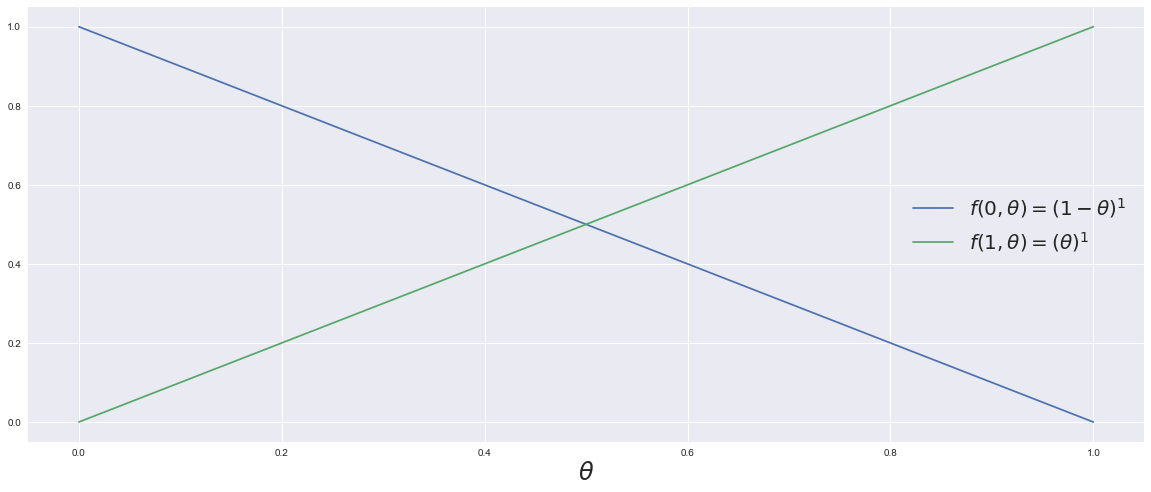

In [6]:
p1 = (2/3)**(0)*(1 - 2/3)**(1-0)
p2 = (2/3)**(1)*(1 - 2/3)**(1-1)
p_range = np.linspace(0, 1, 100)
likeli_0 = (1-p_range) 
likeli_1 = + p_range
plt.figure(figsize=(20, 8));
plt.plot(p_range,likeli_0, label=r'$f(0,\theta)= (1-\theta)^{1}$');
plt.plot(p_range,likeli_1, label=r'$f(1,\theta)= (\theta)^{1}$');
plt.xlabel(r'$\theta$', fontsize=24,);
#plt.ylabel('$f(p,x)$', fontsize=24,)
plt.legend(prop={'size': 20} );

### 5. Teorema de Bayes
---

* Descreve a probabilidade de um evento, baseado em um conhecimento a priori que pode estar relacionado ao evento. 
* Liga o grau de crença em uma posição antes e depois de se considerar as evidências.

$$ P(A~|~B) = \frac{P(B~|~A)~P(A)}{P(B)} $$

Entendendo cada termo:
- $P(A~|~B)$:  é a probabilidade **condicional** de $A$ dado $B$;
- $P(B~|~A)$: é a probabilidade **condicional** de $B$ data $A$;
- $P(A)$: Probabilidade de se observar $A$ independentemente de $B$;
- $P(B)$: Probabilidade de se observar $B$ independentemente de $A$;


### Ex.
---
1. Duas moedas, 
    1. Moeda 1: Moeda Normal, cara de um lado coroa de outro
    1. Moeda 2: Moeda Fake, com dois lados iguais a Cara. 


$$P(Moeda=Normal|Flip=Cara) = \frac{P(Flip=Cara|Coin=Normal)P(Coin=Normal)}{P(Flip=Cara)}$$

# Frequencista vs Bayesiana
-----  

### Tudo se resume a definição de probabilidade:

* Frequencistas: 
   * a probabilidade só tem significado em termos de **casos limites de medições repetidas**.
   * as probabilidades estão fundamentalmente **relacionadas à frequência dos eventos**.
       - *observações* são consideradas variáveis aleatórias:
       - *parâmetros* são considerados fixos.
   * intervalos de confiança e p-values
   
   
* Bayesianos: 
   * o conceito de probabilidade é estendido para abranger **graus de certeza sobre afirmações**.
   * probabilidades estão fundamentalmente **relacionadas ao nosso próprio conhecimento sobre um evento**.
       - *observações* são fixas.
       - *parâmetros* são variáveis aleatórias, sujeitos a uma descrição probabilistica.
   *  intervalo de credibilidade
   

# Regressão Linear
----
* $
y = 1 +2x + e,
$ onde $e \sim \mathcal{N}(0,0.2)$

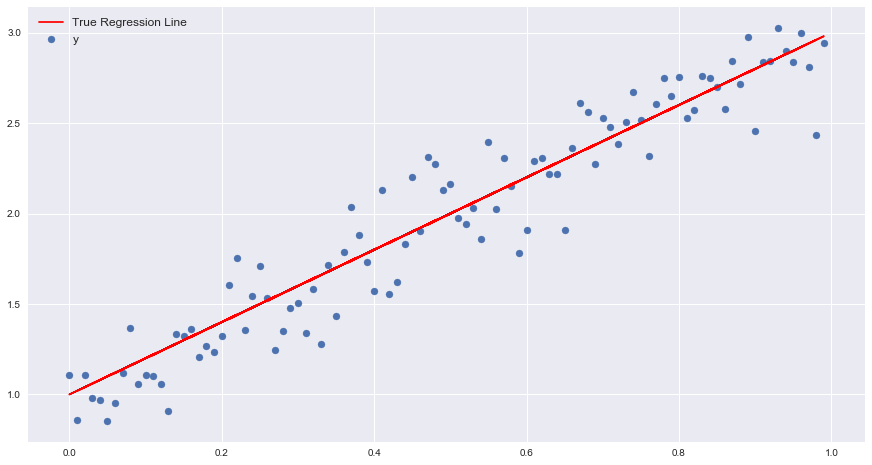

In [7]:
theta_0, theta_1, eps_sigma_sq  = 1.0, 2.0  , 0.2
N = 100 #Number of samples. 
df, err = simulate_linear_data(N, theta_0, theta_1, eps_sigma_sq)

# Estimativa por *maximum likelihood* (Frequencista)
---



* Modelo linear:
$$
{y}(x) = \theta_0^* + \theta_1^* x +e,
$$
    onde $e \sim \mathcal{N}(0,\sigma^2)$ é o erro da medida e $\theta_0^* = 1$ e  $\theta_1^* = 2 $ são os parâmetros que queremos encontrar. 

* Para uma medica a função likelihood é Gaussiana:

    $$
    p(x_i,y_i~|~\theta) \propto \exp\left[-\frac{1}{2\sigma^2}\left(y_i - \hat{y}(x_i)\right)^2\right],
    $$
    onde $\hat{y}(x) = \theta_0 + \theta_1 x$
* A função likelihood completa é o produto de das likelihoods individuais.


$$
 \mathcal{L}(y~|~\theta) = \prod_{i=1}^{N} \frac{1}{2\pi \sigma^2}\exp\left[-\frac{1}{2\sigma^2}\left(y_i - \hat{y}(x_i)\right)^2\right]
$$

# Estimativa por *maximum likelihood* (Frequencista)
---

* Objetivo é encontrar: 
$$
   \hat\theta =  \underset{\theta\in\Theta}{\operatorname{arg\,max}}\   \prod_{i=1}^{N}\exp\left[-\frac{1}{2\sigma^2}\left(y_i - \hat{y}(x_i)\right)^2\right]
$$

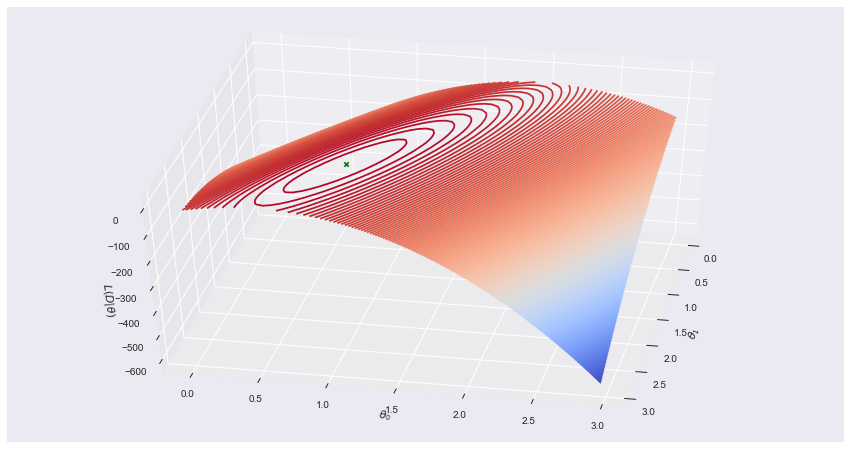

In [8]:
t0_best, t1_best = plot_log_likelihood(df)

In [9]:
df_ols = pd.DataFrame(columns=['theta_1','theta_0'])
df_ols["theta_1"] = df["x"]
df_ols['theta_0'] = 1 
# fit model and summarize
ols_model = sm.OLS(df.y,df_ols).fit()
t1_best, t0_best = ols_model.params
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1070.
Date:                Fri, 31 Aug 2018   Prob (F-statistic):           1.52e-54
Time:                        18:49:35   Log-Likelihood:                 29.642
No. Observations:                 100   AIC:                            -55.28
Df Residuals:                      98   BIC:                            -50.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
theta_1        2.0597      0.063     32.718      0.0

* **point estimate**: Encontramos um único valor para cada parâmetro
* **intervalo de confiança**: intervalo em torno do valor estimado que, se calculado pra múltiplas realizações do experimento, contém o valor real do parâmetro para uma certa fração, e.g., 95%
* **p-value**: probabilidade de se obter um falso positivo

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-wwdd{font-weight:bold;font-size:20px;border-color:inherit;text-align:center}
.tg .tg-fbrz{font-weight:bold;font-size:20px;text-align:center;vertical-align:top}
.tg .tg-wwri{font-size:20px;border-color:inherit;text-align:left}
.tg .tg-60hs{font-size:20px;text-align:left;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-wwdd"></th>
    <th class="tg-wwdd">coef</th>
    <th class="tg-fbrz">$P>|t|$</th>
    <th class="tg-fbrz">[0.025</th>
    <th class="tg-fbrz">0.975]</th>
  </tr>
  <tr>
    <td class="tg-wwdd">$\theta_1$</td>
    <td class="tg-wwri">2.0597</td>
    <td class="tg-60hs">0.000</td>
    <td class="tg-60hs">1.935</td>
    <td class="tg-60hs">2.185</td>
  </tr>
  <tr>
    <td class="tg-wwdd">$\theta_0$</td>
    <td class="tg-wwri">0.9497</td>
    <td class="tg-60hs">0.000</td>
    <td class="tg-60hs">0.878</td>
    <td class="tg-60hs">1.021</td>
  </tr>
</table>

* [simulação](http://digitalfirst.bfwpub.com/stats_applet/stats_applet_4_ci.html)

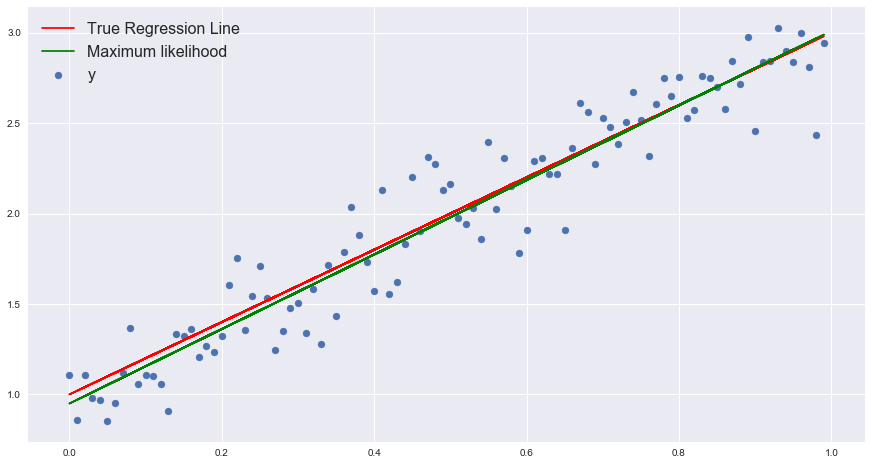

In [10]:
plt.figure(figsize=(15, 8));
plt.scatter(df.x,df.y);
plt.plot(df.x,theta_0 + theta_1*df.x, c='red', label="True Regression Line");
plt.plot(df.x,t0_best + t1_best*df.x, c='green', label='Maximum likelihood');
plt.legend(prop={'size': 16});

# Estimativa Bayesiana
---

* Utiliza o Teorema de Bayes para fazer inferência de parâmetro de distribuições

$$ P(\theta~|~y) = \frac{P(y~|~\theta)~P(\theta)}{P(y)} $$

Entendendo cada termo:
- $P(\theta~|~y)$: Probabilidade **a posterior**, probabilidade dos parâmetros dadas as medidas. É o resultado da estimativa Bayesiana.

- $P(y)$: Probabilidade das medidas, maioria das vezes utilizada como constante de normalização

- $P(y~|~\theta)$: Funcão **likelihood**, proporcional a $\mathcal{L}(y~|~\theta)$ dos frequencistas.

- $P(\theta)$: Probabilidade **a priori** dos parâmetros, codifica o que sabemos sobre o modelo antes da utilização das medidas  $y$.

# Estimativa Bayesiana
---
* Modelo linear:
$$
{y}(x) = \theta_0^* + \theta_1^* x +e,
$$
Temos que
$$ P(\theta~|~y) = \frac{\overbrace{\mathcal{L}(y|\theta)}^{P(y~|~\theta)}~P(\theta) }{P(y)} $$

* $\mathcal{L}(y|\theta)$ é a mesma que no caso frequencista.


* Se considerarmos $P(\theta) \propto 1$ (*"não informativa"*), temos:

$$P(\theta|y) \propto \mathcal{L}(y|\theta)$$

* probabilidade Bayesiana é maximizada no mesmo valor do caso frequencista! 

In [11]:
import pymc3 as pm
def glm_mcmc_inference(df, iterations=5000):
    basic_model = pm.Model()
    with basic_model:
        pm.glm.GLM.from_formula("y ~ x", df, family=pm.glm.families.Normal())
        step = pm.NUTS()
        trace = pm.sample(
            iterations, step, tune = 500, #start, 
            random_seed=42, progressbar=True
        )
    return trace
trace = glm_mcmc_inference(df, iterations=10000)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, x, Intercept]
Sampling 4 chains: 100%|██████████| 42000/42000 [00:19<00:00, 2146.69draws/s]
The acceptance probability does not match the target. It is 0.8946268698997951, but should be close to 0.8. Try to increase the number of tuning steps.


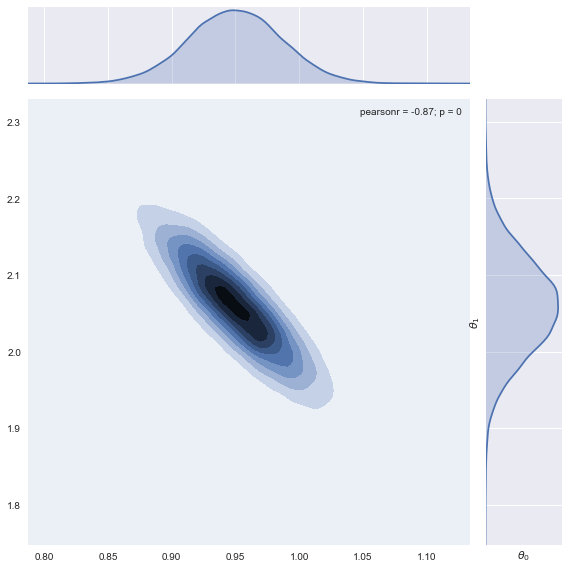

In [12]:
sns.jointplot(trace['Intercept'], trace['x'], kind="kde",size =8)
plt.xlabel(r"$\theta_0$"),plt.ylabel(r"$\theta_1$"), plt.show();

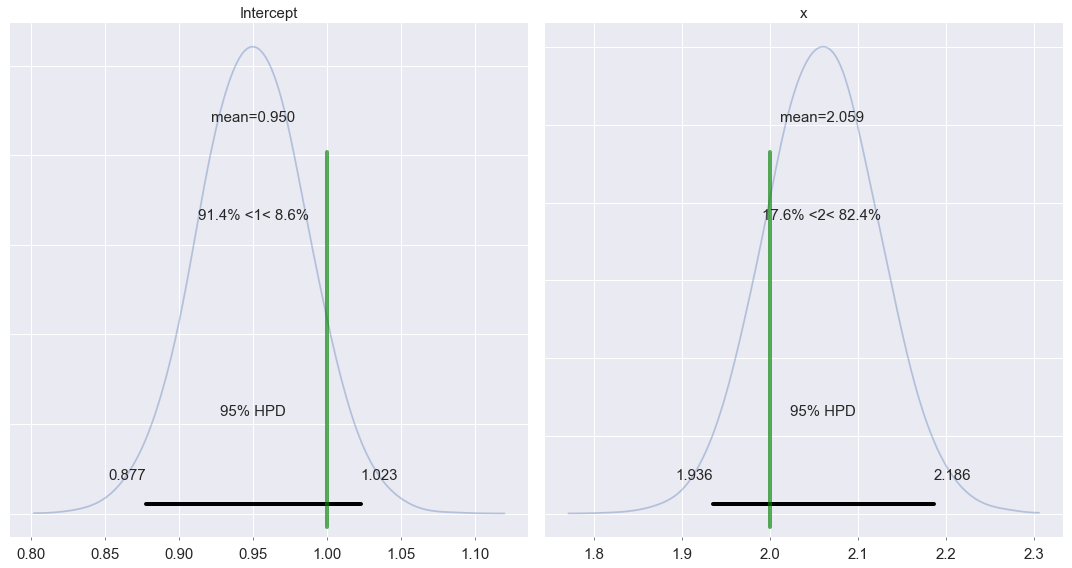

In [13]:
pm.plot_posterior(trace,figsize=(15, 8), varnames=['Intercept', 'x'],kde_plot =True, ref_val=[theta_0,theta_1,eps_sigma_sq], alpha_level=0.05);

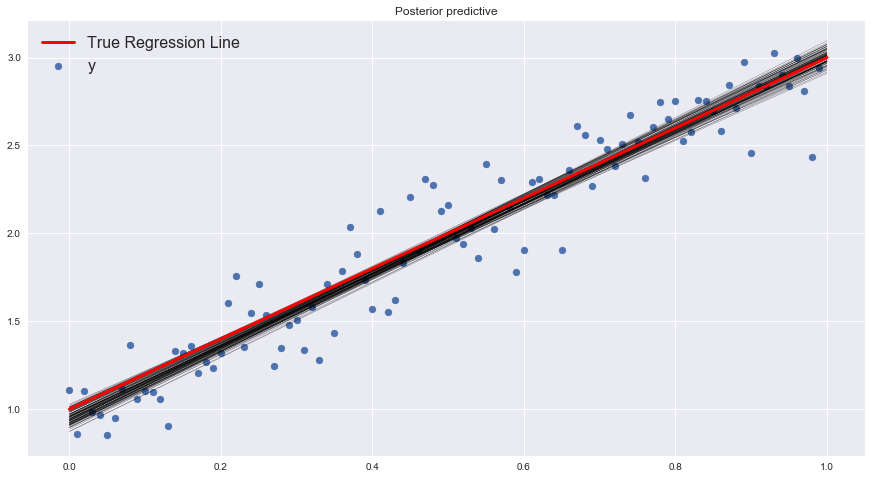

In [14]:
plt.figure(figsize=(15, 8));
plt.scatter(df.x,df.y);
pm.plot_posterior_predictive_glm(trace, samples=100)
x = np.linspace(0, 1, N)
y = theta_0 + theta_1*x
plt.plot(x, y, label="True Regression Line", lw=3., c="red")
plt.legend(loc=0,prop={'size': 16})
plt.show()

In [15]:
pm.summary(trace).round(2)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Intercept,0.95,0.04,0.0,0.88,1.02,16302.05,1.0
x,2.06,0.06,0.0,1.94,2.19,16180.53,1.0
sd,0.18,0.01,0.0,0.16,0.21,23172.49,1.0


# Estimativa de Maximum a posteriori
---
* nada impede que peguemos o valor com a maior probabilidade a posteriori:

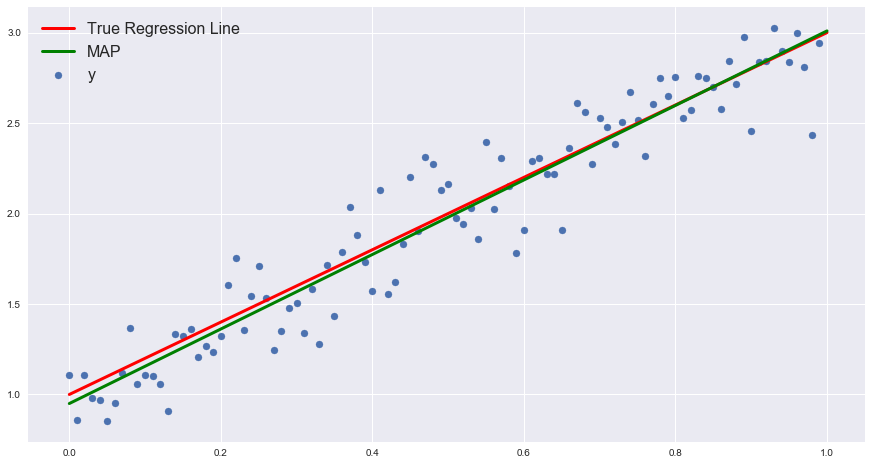

In [16]:
x = np.linspace(0, 1, N)
y = theta_0 + theta_1*x
y_map = trace['Intercept'].mean() + trace['x'].mean()*x
plt.figure(figsize=(15, 8));
plt.scatter(df.x,df.y);
plt.plot(x, y, label="True Regression Line", lw=3., c="red")
plt.plot(x, y_map, label="MAP", lw=3., c="g")
plt.legend(loc=0,prop={'size': 16}), plt.show();

### Qual o papel da Prior
----
* Prior permite incluir informações extras
* A necessidade de especificar uma *prior* é a principal controversia na análise Bayesiana
* Frequencistas dizem que a *prior* é um ploblema quando nenhum informação extra é conhecida.Baysianistas rebatem falando que  é possivel utilizar priors **não infromativas** 
* Quanto mais informativa a prior menos dados eu preciso


In [17]:
prior_alpha, prior_beta = 1,1
dist = ss.beta
n_trials = [0, 1,2,3,4,5,10,20,30,40,50,60, 100,200,300,400,500, 1000]
data = ss.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 200)

### Prior não informativa
----
* Cara-coroa
* Se considerarmos $P(\theta) \propto 1$ (*"não informativa"*), temos:

$$P(\theta|y) \propto \mathcal{L}(y|\theta)$$


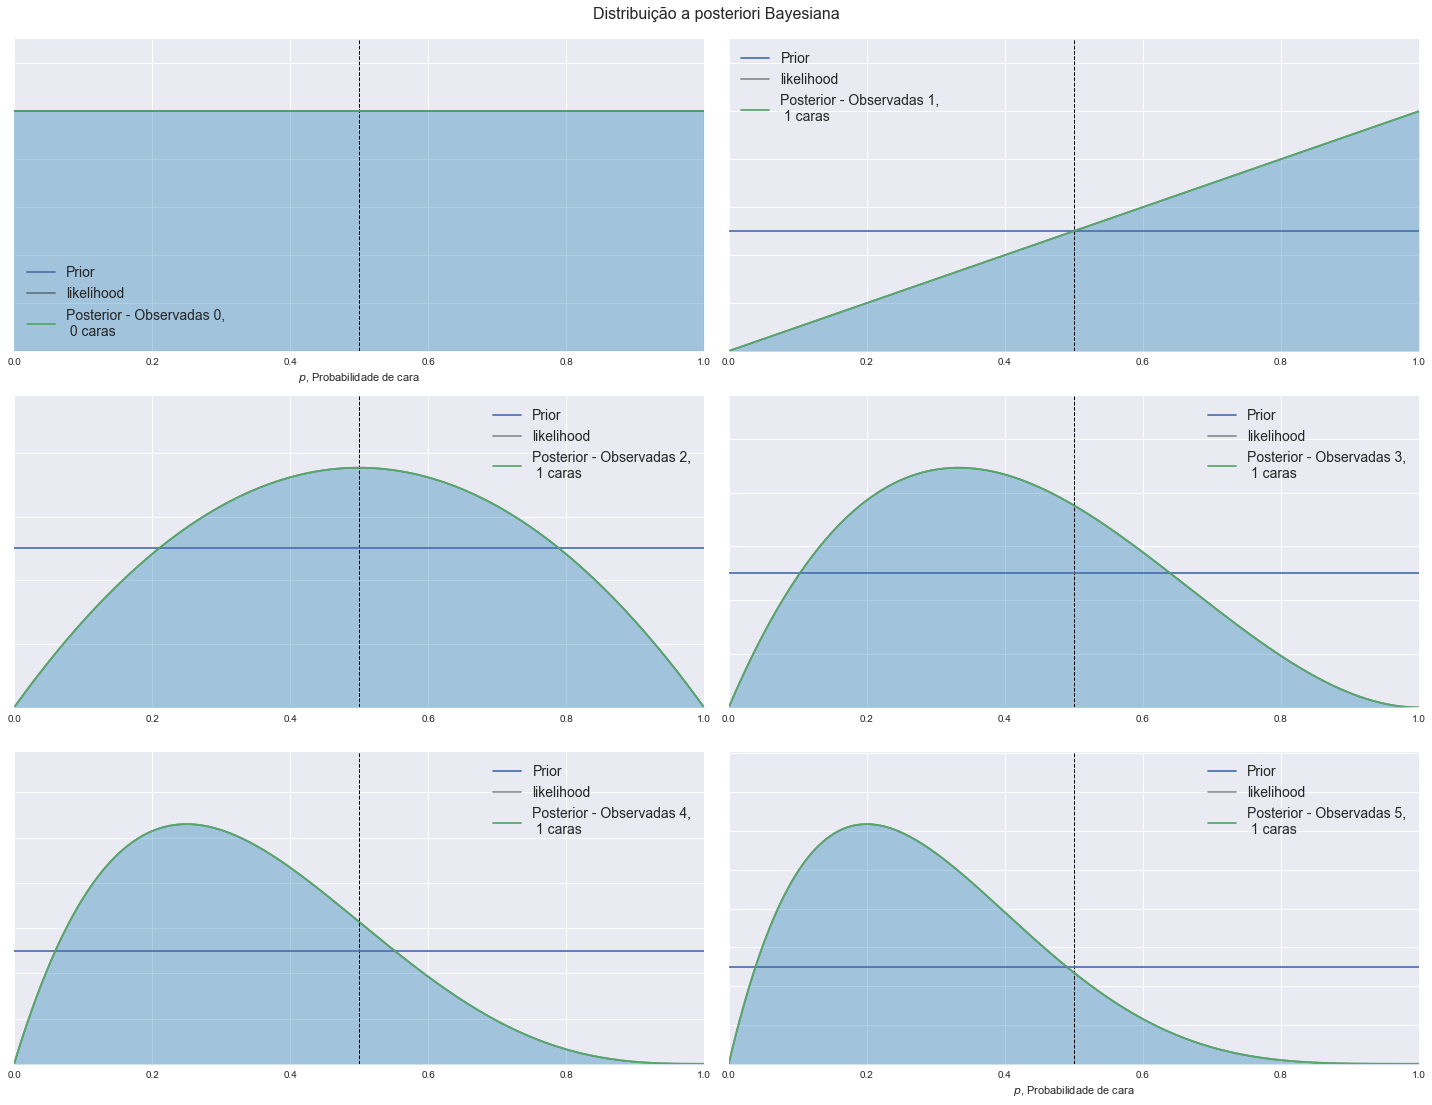

In [18]:

n_trials_to_use = n_trials[:6]
plt.figure(figsize=(20, 15))
# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials_to_use):
    
    sx = plt.subplot(len(n_trials_to_use)/2, 2, k+1)
    temp = ss.beta.pdf(x, prior_alpha, prior_beta)
    plt.plot(x, temp/temp.sum(), label='Prior')
    
    plt.xlabel("$p$, Probabilidade de cara") \
        if k in [0, len(n_trials_to_use)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    
    lik = [ss.binom.pmf(heads, N, p) for p in x]
    plt.plot(x, lik/sum(lik), 'k', label='likelihood', alpha=0.4)

    y = dist.pdf(x, prior_alpha + heads, prior_beta + N - heads)
    y = y/y.sum()
    plt.plot(x, y, label="Posterior - Observadas %d,\n %d caras" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, y.max()+y.max()*0.3, color="k", linestyles="--", lw=1)

    leg = plt.legend(prop={'size': 14})
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Distribuição a posteriori Bayesiana",
             y=1.02,
             fontsize=16)

plt.tight_layout()

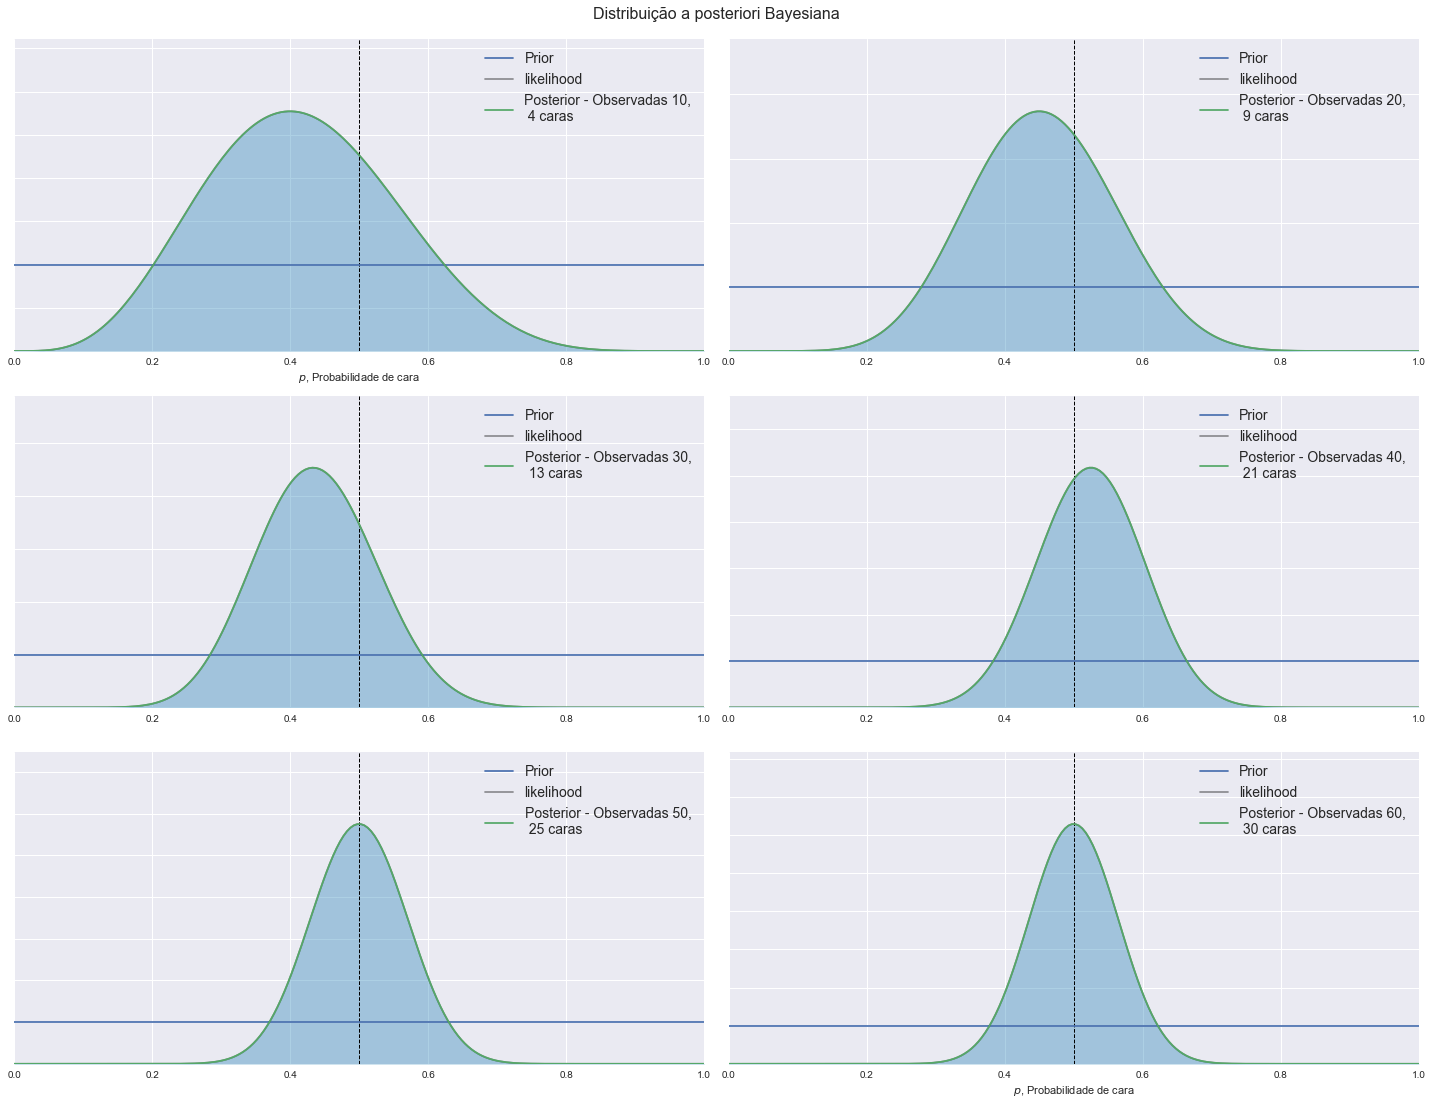

In [19]:
n_trials_to_use = n_trials[6:12]
plt.figure(figsize=(20, 15))
# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials_to_use):
    
    sx = plt.subplot(len(n_trials_to_use)/2, 2, k+1)
    temp = ss.beta.pdf(x, prior_alpha, prior_beta)
    plt.plot(x, temp/temp.sum(), label='Prior')
    
    plt.xlabel("$p$, Probabilidade de cara") \
        if k in [0, len(n_trials_to_use)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    
    lik = [ss.binom.pmf(heads, N, p) for p in x]
    plt.plot(x, lik/sum(lik), 'k', label='likelihood', alpha=0.4)

    y = dist.pdf(x, prior_alpha + heads, prior_beta + N - heads)
    y = y/y.sum()
    plt.plot(x, y, label="Posterior - Observadas %d,\n %d caras" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, y.max()+y.max()*0.3, color="k", linestyles="--", lw=1)

    leg = plt.legend(prop={'size': 14})
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Distribuição a posteriori Bayesiana",
             y=1.02,
             fontsize=16)

plt.tight_layout()

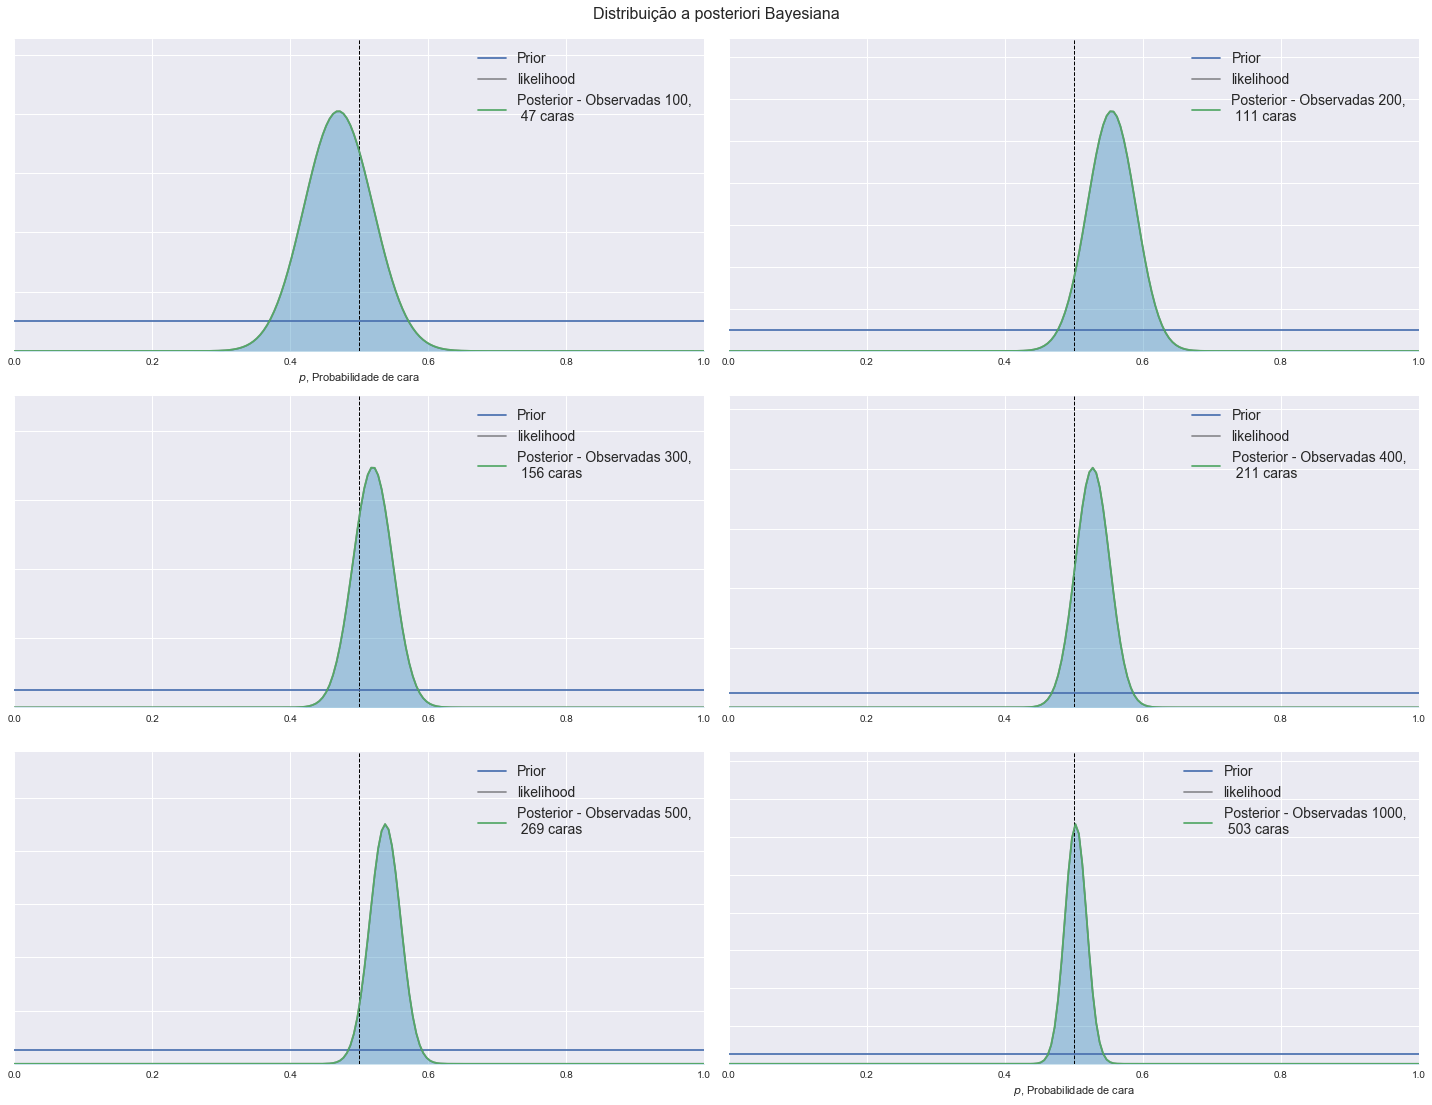

In [20]:
n_trials_to_use = n_trials[12:]
plt.figure(figsize=(20, 15))
# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials_to_use):
    
    sx = plt.subplot(len(n_trials_to_use)/2, 2, k+1)
    temp = ss.beta.pdf(x, prior_alpha, prior_beta)
    plt.plot(x, temp/temp.sum(), label='Prior')
    
    plt.xlabel("$p$, Probabilidade de cara") \
        if k in [0, len(n_trials_to_use)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    
    lik = [ss.binom.pmf(heads, N, p) for p in x]
    plt.plot(x, lik/sum(lik), 'k', label='likelihood', alpha=0.4)

    y = dist.pdf(x, prior_alpha + heads, prior_beta + N - heads)
    y = y/y.sum()
    plt.plot(x, y, label="Posterior - Observadas %d,\n %d caras" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, y.max()+y.max()*0.3, color="k", linestyles="--", lw=1)

    leg = plt.legend(prop={'size': 14})
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Distribuição a posteriori Bayesiana",
             y=1.02,
             fontsize=16)

plt.tight_layout()

In [21]:
dist = ss.beta
#n_trials = [0, 1,2,3,4,5,10,20,30,40,50,60, 100,200,300,400,500, 1000]
#data = ss.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 200)
prior_alpha, prior_beta = 5,5
temp = ss.beta.pdf(x, prior_alpha, prior_beta)
temp = temp/temp.sum()


### Prior "mais" informativa
----
* Cara-coroa
* Se considerarmos $P(\theta) \propto  Bernoulli(5,5)$

$$P(\theta|y) \propto \mathcal{L}(y|\theta)Bernoulli(5,5)$$


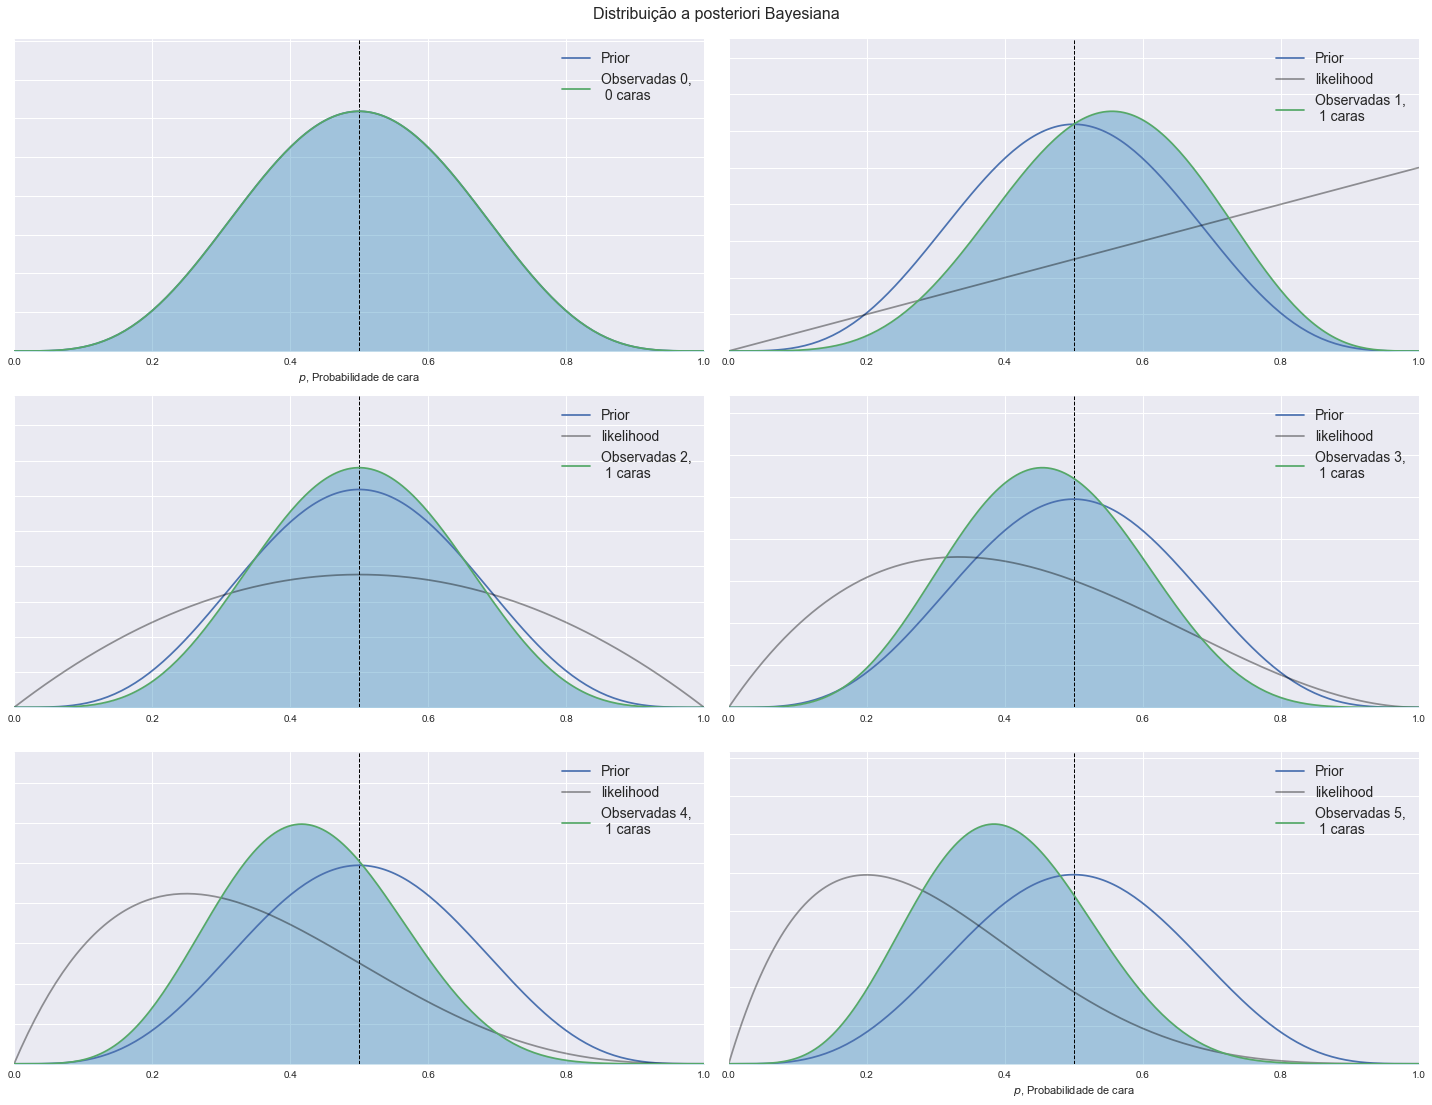

In [22]:
plt.figure(figsize=(20, 15))
n_trials_to_use = n_trials[:6]
for k, N in enumerate(n_trials_to_use):
    
    sx = plt.subplot(len(n_trials_to_use)/2, 2, k+1)
    
    plt.plot(x, temp, label='Prior')
    plt.xlabel("$p$, Probabilidade de cara") \
        if k in [0, len(n_trials_to_use)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    if k>0:
        lik = [ss.binom.pmf(heads, N, p) for p in x]
        plt.plot(x, lik/sum(lik), 'k', label='likelihood', alpha=0.4)

    y = dist.pdf(x, prior_alpha + heads, prior_beta + N - heads)
    y = y/y.sum()
    plt.plot(x, y, label="Observadas %d,\n %d caras" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, y.max()+y.max()*0.3, color="k", linestyles="--", lw=1)

    leg = plt.legend(prop={'size': 14})
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Distribuição a posteriori Bayesiana",
             y=1.02,
             fontsize=16)

plt.tight_layout()

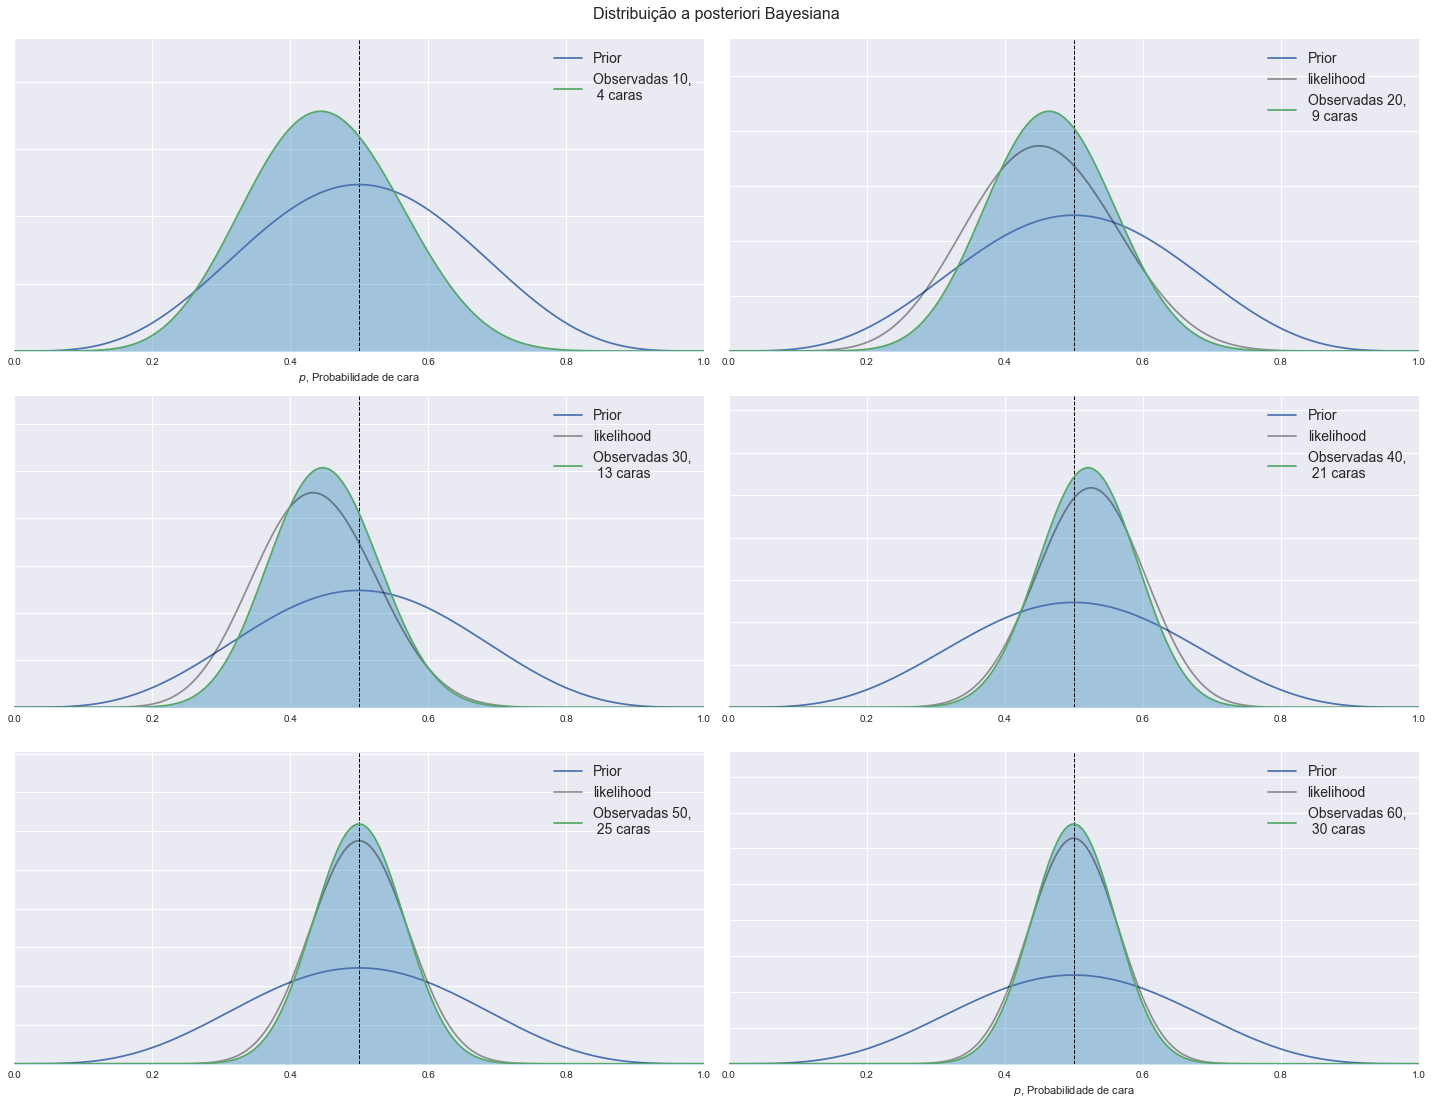

In [23]:
plt.figure(figsize=(20, 15))
n_trials_to_use = n_trials[6:12]
for k, N in enumerate(n_trials_to_use):
    
    sx = plt.subplot(len(n_trials_to_use)/2, 2, k+1)
    
    plt.plot(x, temp, label='Prior')
    plt.xlabel("$p$, Probabilidade de cara") \
        if k in [0, len(n_trials_to_use)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    if k>0:
        lik = [ss.binom.pmf(heads, N, p) for p in x]
        plt.plot(x, lik/sum(lik), 'k', label='likelihood', alpha=0.4)

    y = dist.pdf(x, prior_alpha + heads, prior_beta + N - heads)
    y = y/y.sum()
    plt.plot(x, y, label="Observadas %d,\n %d caras" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, y.max()+y.max()*0.3, color="k", linestyles="--", lw=1)

    leg = plt.legend(prop={'size': 14})
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Distribuição a posteriori Bayesiana",
             y=1.02,
             fontsize=16)

plt.tight_layout()

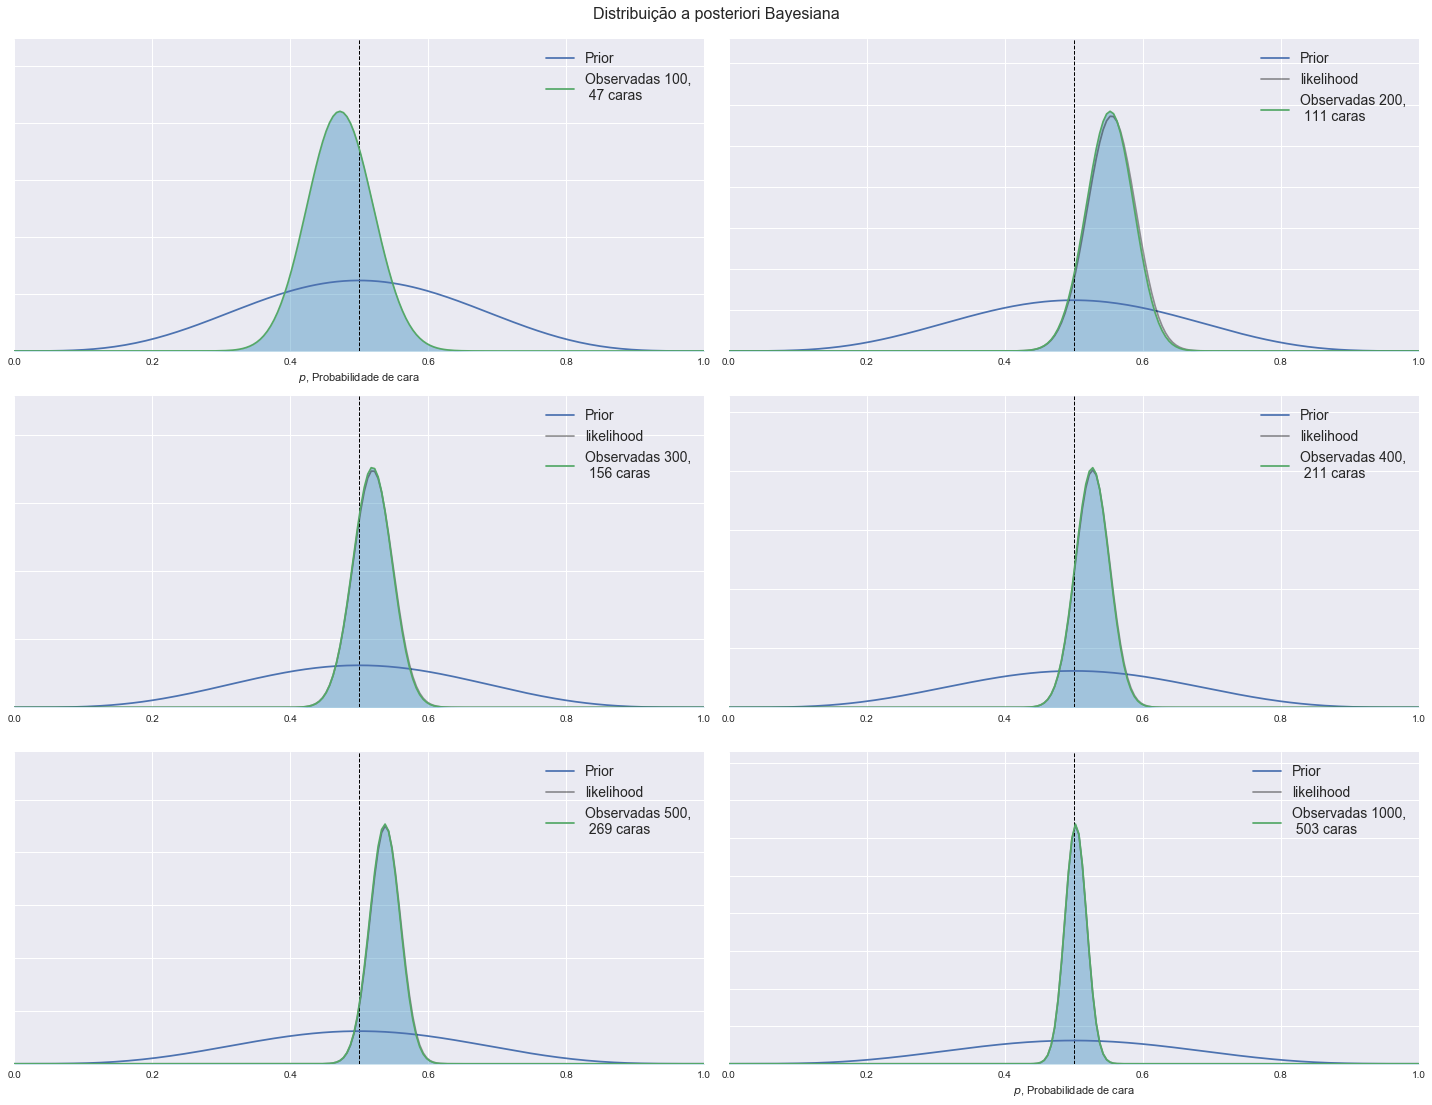

In [24]:
plt.figure(figsize=(20, 15))
n_trials_to_use = n_trials[12:]
for k, N in enumerate(n_trials_to_use):
    
    sx = plt.subplot(len(n_trials_to_use)/2, 2, k+1)
    
    plt.plot(x, temp, label='Prior')
    plt.xlabel("$p$, Probabilidade de cara") \
        if k in [0, len(n_trials_to_use)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    if k>0:
        lik = [ss.binom.pmf(heads, N, p) for p in x]
        plt.plot(x, lik/sum(lik), 'k', label='likelihood', alpha=0.4)

    y = dist.pdf(x, prior_alpha + heads, prior_beta + N - heads)
    y = y/y.sum()
    plt.plot(x, y, label="Observadas %d,\n %d caras" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, y.max()+y.max()*0.3, color="k", linestyles="--", lw=1)

    leg = plt.legend(prop={'size': 14})
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Distribuição a posteriori Bayesiana",
             y=1.02,
             fontsize=16)

plt.tight_layout()

## Qual é a melhor?
-----  

### Inferência Bayesiana
* Utiliza probabilidades para descrever os parâmetros e os dados;
* Depende da *prior* e da função likelihood;
* Precisa que exista uma prior "subjetiva";
* Pode exigir um alto poder computacional, principalmente problemas com muitos parâmetros;
* A distribuição a posteriori tende a ser mais complicada de ser utilizada;
* Podemos utilizar a distribuição a posteriori de um experimento como prior de um segundo;

### Inferência Frequencista
* Não fornece informação de probabilidade sobre parâmetros;
* Depende da função likelihood para cada ponto observado ou não;
* Não precisa que exista uma prior;
* Dende a exigir de menos poder computacional;
* Interpretação pode ser confusa;

# Inferência Frequencista vs Bayesiana
-----



#### Obrigado!

rafael.rui_at_totvs.com.br